## Week 4:

New Topics:

* Reading data from Excel
* `geopandas` and choropleths
  
 Coding tasks:
  


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

  1. Create a choropleth showing the unemployment rate per county for each Tennessee county.


In [3]:
counties = gpd.read_file('../data/county/tncounty.shp')
counties.head(2)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."


In [4]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [6]:
unemployment['Name'] = unemployment['Name'].str[:-11]
unemployment.head(2)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2


In [13]:
unemployment = unemployment.rename(columns={'Name':'NAME'})
unemployment.head(2)

,laus_code,State,County,NAME,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2


In [15]:
counties_unemployment = pd.merge(left = counties,
                    right = unemployment[['NAME', 'unemployment_rate']])
counties_unemployment.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,unemployment_rate
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",4.3
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",5.3
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",5.2
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",4.8
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",5.6


In [16]:
counties_unemployment['unemployment_rate'] = pd.to_numeric(counties_unemployment['unemployment_rate'])

c:\Users\zhuj22\Anaconda3\envs\geo_dse\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


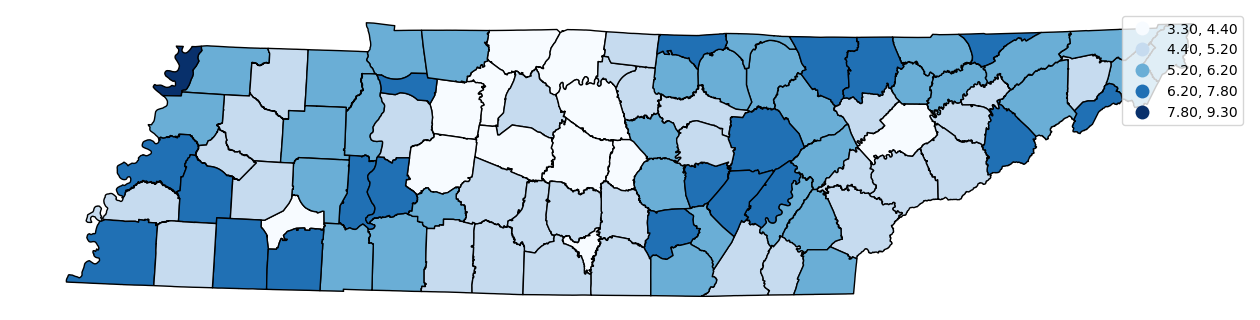

In [20]:
fig, ax = plt.subplots(figsize=(16,4))
counties_unemployment.plot(column = 'unemployment_rate',
                           edgecolor = 'black',
                           cmap = 'Blues',
                           scheme="NaturalBreaks",
                           legend = True,
                           ax = ax)
ax.axis('off');

  2. Create a choropleth showing the SHADAC category for each county (adequate, low inadequate, and moderately inadequate).


In [21]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')
physicians =  physicians.loc[physicians['state']=='Tennessee']
population = pd.read_csv('../data/population_by_county.csv')
physicians = pd.merge(left=physicians,right=population.drop(columns=['county','state']).loc[population['state']=='TENNESSEE'],on='FIPS')
physicians.loc[physicians['population']/physicians['primary_care_physicians'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['population']/physicians['primary_care_physicians'] >= 1500) & 
          (physicians['population']/physicians['primary_care_physicians'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['population']/physicians['primary_care_physicians'] >= 3500), 'shadac_category'] = 'low inadequate'

In [22]:
physicians.head(2)

,FIPS,state,county,primary_care_physicians,population,urban,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,moderately inadequate


In [24]:
counties_shadac = pd.merge(left = counties_unemployment,
                           right = physicians[['county', 'shadac_category']],
                           left_on = 'NAME',
                           right_on = 'county')

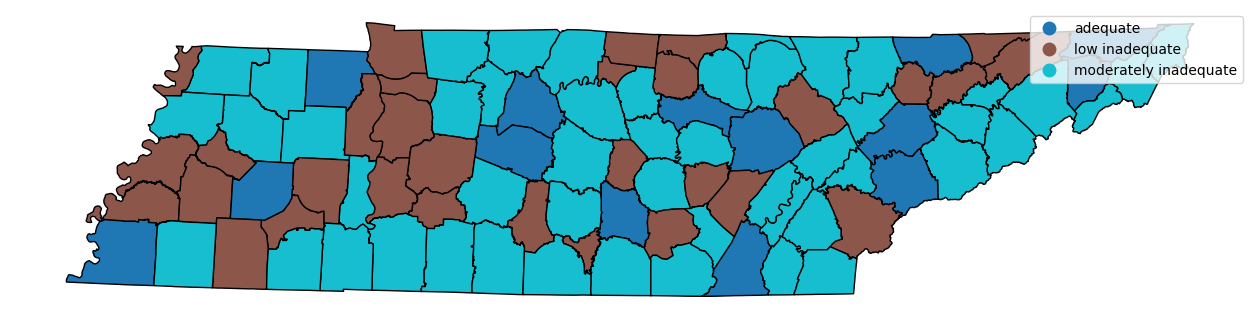

In [28]:
fig, ax = plt.subplots(figsize=(16,4))
counties_shadac.plot(column = 'shadac_category',
                           edgecolor = 'black',
                           legend = True,
                           ax = ax)
ax.axis('off');

  3. After creating the choropleth, you can start working on addressing the first two questions for TN Med Helper described in the project README. There are a few files in the data folder that can be helpful for this:
  * Medicare_Disparities_by_Population - This folder contains data obtained from the [Centers for Medicare and Medicaid Services](https://data.cms.gov/tools/mapping-medicare-disparities-by-population), as described in the README.


  * County_Health_Rankings - This folder contains the [2020 County Health Rankings](https://www.countyhealthrankings.org/).
  * Closures-Database-for-Web.xlsx, which contains a dataset of rural hospital closures, obtained from [UNC's Sheps Center](https://www.shepscenter.unc.edu/programs-projects/rural-health/rural-hospital-closures/). 

In [27]:
counties_shadac.to_csv('counties_shadac.csv')